# Perceptron code implementation.

In [1]:
import torch

import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

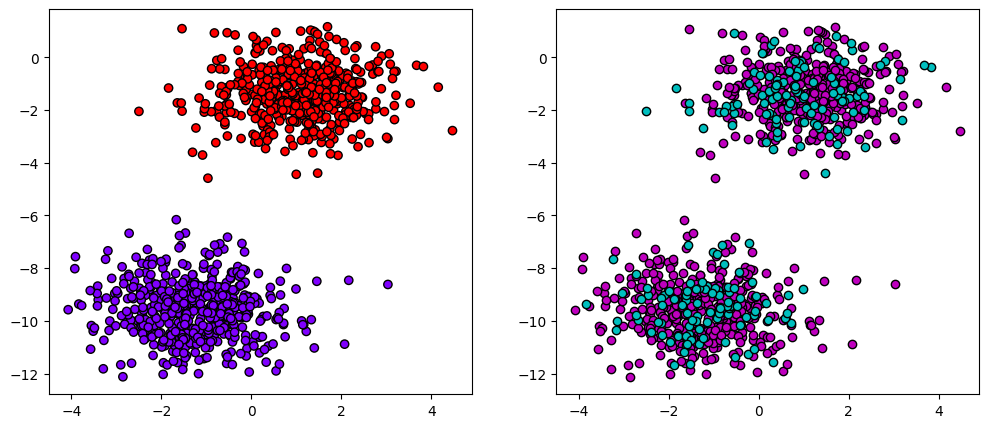

In [2]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=1.05, random_state=2)

X_train, X_test, y_train, y_test = train_test_split( X , y , test_size = 0.20, random_state = 2)
print ( _ )

_, axes = plt.subplots(1,2, figsize=(12,5))

# plot everythig
axes[0].scatter(X[:,0], X[:,1], c = y, edgecolors='k', cmap='rainbow')
axes[1].scatter(X_train[:,0], X_train[:,1], c = 'm', edgecolors='k')
axes[1].scatter(X_test[:,0], X_test[:,1], c = 'c', edgecolors='k')


## Perceptron code

In [7]:
def activation(cond, x_1, x_2):
    return (cond * x_1) + (~(cond) * x_2)

class Perceptron():
    def __init__(self, num_features, learning_rate):
        self.learning_rate = learning_rate
        self.num_features = num_features
        self.weights = torch.zeros(num_features , 1)
        self.bias = torch.zeros(1)
        self.loss = []

    def mse(self, y_true, y_pred):
      return(torch.square(y_true - y_pred).mean())

    def forward(self, x ):
        u = torch.add(torch.mm( x, self.weights ), self.bias )
        predictions = activation(u > 0, 1, 0).float() # Step
        return predictions

    def backward(self, x, y):
        predictions = self.forward(x)
        errors = self.mse(y, predictions)
        return errors

    def gradient_step(self, w_gradient, b_gradient):
        self.weights = self.weights - (self.learning_rate * w_gradient)
        self.bias = self.bias - (self.learning_rate * b_gradient)

    def train(self, x, y, epochs = 20):
        for epoch in range( epochs ):

            weights_gradient, bias_gradient, epoch_error = 0,0,0

            for i in range(y.shape[0]):
                xr = x[i].view(1,self.num_features)
                predictions = self.forward(xr)
                errors = self.backward(xr, y[i]).view(-1)

                #compute gradients
                weights_gradient -= 2 * (y[i] - predictions) * xr
                bias_gradient -= 2 * (y[i] - predictions) * 14
                epoch_error += errors

            weights_gradient = (weights_gradient / y.shape[0]).view(self.num_features,1)
            bias_gradient = bias_gradient / y.shape[0]

            self.gradient_step(weights_gradient, bias_gradient)
            self.loss.append(epoch_error.item() / y.shape[0])
            self.weights = self.weights.view(self.num_features, 1)

    def evaluate(self, x, y):
        predictions = self.forward(x).view(-1)
        accuracy = torch.sum(predictions == y).float() / y.shape[0]
        return accuracy

In [22]:
pps = Perceptron(num_features=2, learning_rate=0.1)

X_train_tensor = torch.from_numpy( X_train ).type(torch.FloatTensor)#.to('cpu')
y_train_tensor = torch.from_numpy( y_train ).type(torch.FloatTensor)#.to('cpu')

pps.train( X_train_tensor , y_train_tensor , epochs=20)

In [23]:
print('Model parameters:')
print('  Weights: %s' % pps.weights)
print('  Bias: %s' % pps.bias)

Model parameters:
  Weights: tensor([[0.3288],
        [0.5110]])
  Bias: tensor([[1.9740]])


In [24]:
X_test_tensor = torch.from_numpy( X_test ).type(torch.FloatTensor)#.to('cpu')
y_test_tensor = torch.from_numpy( y_test ).type(torch.FloatTensor)#.to('cpu')

test_acc = pps.evaluate( X_test_tensor , y_test_tensor )
print('Test set accuracy: %.2f%%' % (test_acc*100))

Test set accuracy: 100.00%


## Plot everything

In [25]:
# Min max values for the decision bounding grid
h_min, h_max = X_test[:,0].min()-0.1 ,X_test[:,0].max()+0.1
v_min, v_max = X_test[:,1].min()-0.1 , X_test[:,1].max()+0.1

# Create the grid
h_grid, v_grid = np.meshgrid(np.linspace( h_min , h_max , 100), np.linspace( v_min , v_max , 100))

# Predict
to_predict = torch.from_numpy(np.c_[h_grid.ravel(), v_grid.ravel()]).type(torch.FloatTensor)#.to('cpu')
predictions = pps.forward( to_predict )
predictions = predictions.numpy().reshape(h_grid.shape)

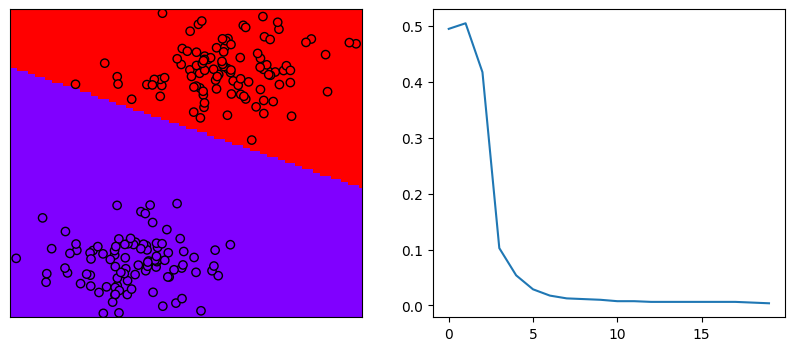

In [14]:
# Draw everything
_, axes = plt.subplots (1,2, figsize=(10,4))
axes[0].pcolormesh( h_grid , v_grid , predictions , cmap = 'rainbow')

# show the scatter
axes[0].scatter ( X_test[:,0], X_test[:,1] ,  c = y_test , edgecolors='k', cmap='rainbow')

axes[0].set_xticks(())
axes[0].set_yticks(())

axes[1].plot(range(len(pps.loss)), pps.loss)